# Assignment 1

The aim of Assignment 1 is to implement a concept learner and to verify that it works as expected using the following:  
**Group assignment:** Max 2 students  

**Prerequisite reading:** Chapter 4 in the main literature  

**Language:** Python (it is not permitted to use any existing code except the standard libraries,  you are allowed to use standard libraries and other libraries that help you preprocess the data, etc.)  

**Data:** Spambase Dataset, https://archive.ics.uci.edu/ml/datasets/SpambaseLinks to an external site.  

**Algorithm:** Algorithm 4.1 and either Algorithm 4.2 or 4.3 in the main literature (it is not permitted to use already implemented algorithms, you must implement  Algorithm 4.1 and either Algorithm 4.2 or 4.3 yourselves.)  

**Procedure**  
Identify a suitable preprocessing method for data transformation (continuous to discrete).  

<ins>Compute:</ins>
1) the size of possible instances
2) the size of hypothesis space (the number of possible extensions)
3) the number of possible conjunctive concepts according to the descriptions in Section 4.1 of the main literature

Implement the algorithm and verify that it works as expected.  
Compute the accuracy of the model and report the generated model, i.e., the conjunctive rule.  

**Written report**  
Template: The IEEE conference template and citation style should be followed (templatesLinks to an external site. in MS word and LaTeX).  
Language:  English without spelling mistakes.  
Style: Clear.  
Format: PDF.  
Page limit: 1 page excluding references (no abstract should be included).  

**Code**  
Provide meaningful comments for different blocks of the code.  
A *README.TXT* file must clearly state exactly how to execute the code and any necessary setups.  

**Submission**  
Make sure to include your names in the report and the code.  
The report must be submitted as a PDF separately (not to be included in the ZIP file).  
Code and additional files related to implementation must be archived using ZIP.

In [18]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

In [19]:
# set configurations
%matplotlib widget
plt.rcParams['figure.figsize'] = (20, 10)

In [3]:
# columns are saved in the data/names.txt file. Here we all entries without the newline character in a list.
with open("data/names.txt", "r") as f:
    columns = f.read().splitlines()

In [4]:
# import data/spambase.data with read_csv method and set names of columns equal to the list we created above. 
df = pd.read_csv("data/spambase.data", names=columns)

In [5]:
# read head of table.
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_orders,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


### Sanity check
Asserting that our columns match the described columns in the spambase.names file. If the assertion fails we receive an error, if not, it passes.

In [6]:
# assert whether theres 48 attributes of type word_freq_WORD
assert len([col for col in [cols for cols in df.columns] if "word_freq" in col]) == 48
# assert whether theres 48 attributes of type char_freq_CHAR
assert len([col for col in [cols for cols in df.columns] if "char_freq" in col]) == 6
# assert whether theres 1 attribute of type capital_run_length_average
assert len([col for col in [cols for cols in df.columns] if "capital_run_length_average" in col]) == 1
# assert whether theres 1 attribute of type capital_run_length_longest
assert len([col for col in [cols for cols in df.columns] if "capital_run_length_longest" in col]) == 1
# assert whether theres 1 attribute of type capital_run_length_total
assert len([col for col in [cols for cols in df.columns] if "capital_run_length_total" in col]) == 1
# assert whether the spam column only contains bools (1s or 0s).
assert (df.is_spam.unique() == [1, 0]).all()
# assert whether theres 58 cols
assert df.columns.nunique() == 58

## Data exploration

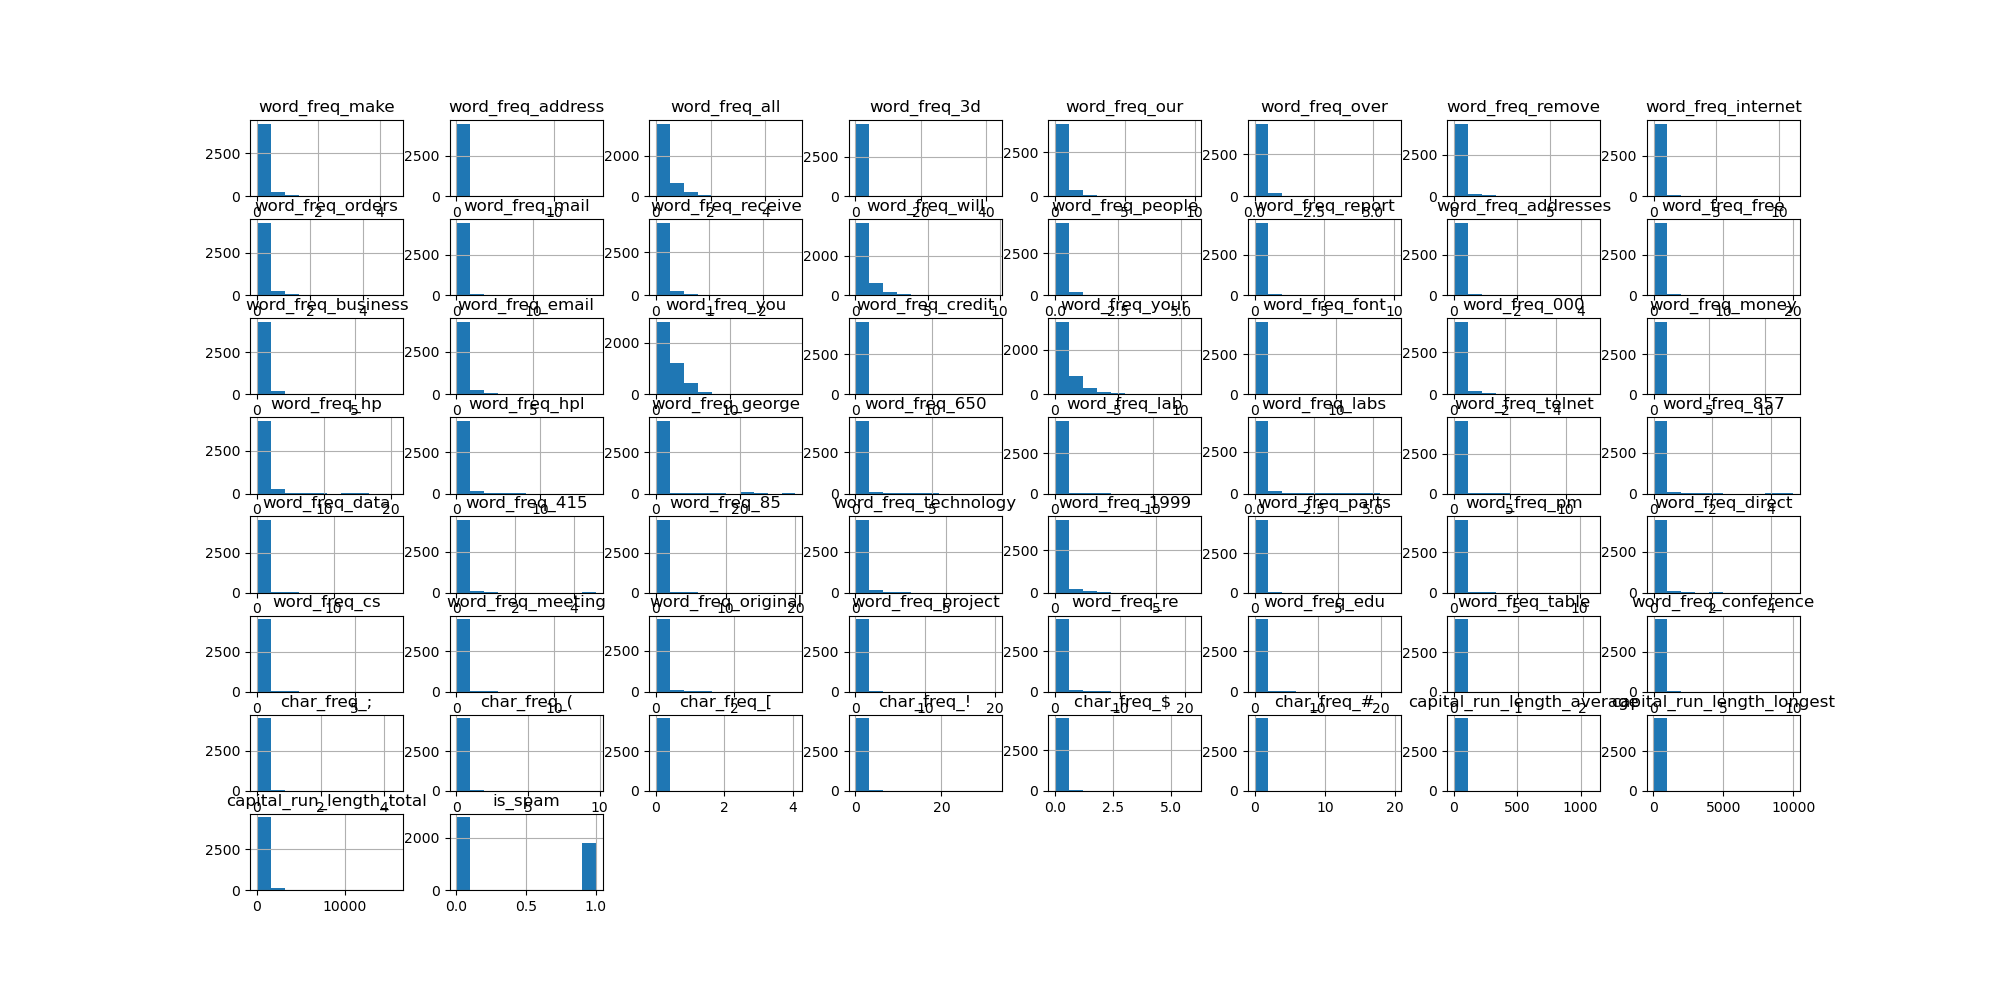

In [20]:
df.hist();

Based on above grahps we can conclude that the data set is very skewed 

## Data munging/wrangling

In [8]:
# check data types
df.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_orders              float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

# -

In [9]:
# all but the last three columns (continuous values)
def df_transformation(df_):
    return (
        pd
        .DataFrame(KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform').fit_transform(df_), 
                   columns=columns, 
                   dtype=np.int8))

In [15]:
df_transformed = df_transformation(df)
df_transformed.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_orders,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
2,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,9
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [14]:
# assert that changes in data size didnt effect the values in the table
assert (df.iloc[:, -3:].describe() == df_transformed.iloc[:, -3:].describe()).any().any()

In [16]:
df_transformed.dtypes

word_freq_make                int8
word_freq_address             int8
word_freq_all                 int8
word_freq_3d                  int8
word_freq_our                 int8
word_freq_over                int8
word_freq_remove              int8
word_freq_internet            int8
word_freq_orders              int8
word_freq_mail                int8
word_freq_receive             int8
word_freq_will                int8
word_freq_people              int8
word_freq_report              int8
word_freq_addresses           int8
word_freq_free                int8
word_freq_business            int8
word_freq_email               int8
word_freq_you                 int8
word_freq_credit              int8
word_freq_your                int8
word_freq_font                int8
word_freq_000                 int8
word_freq_money               int8
word_freq_hp                  int8
word_freq_hpl                 int8
word_freq_george              int8
word_freq_650                 int8
word_freq_lab       

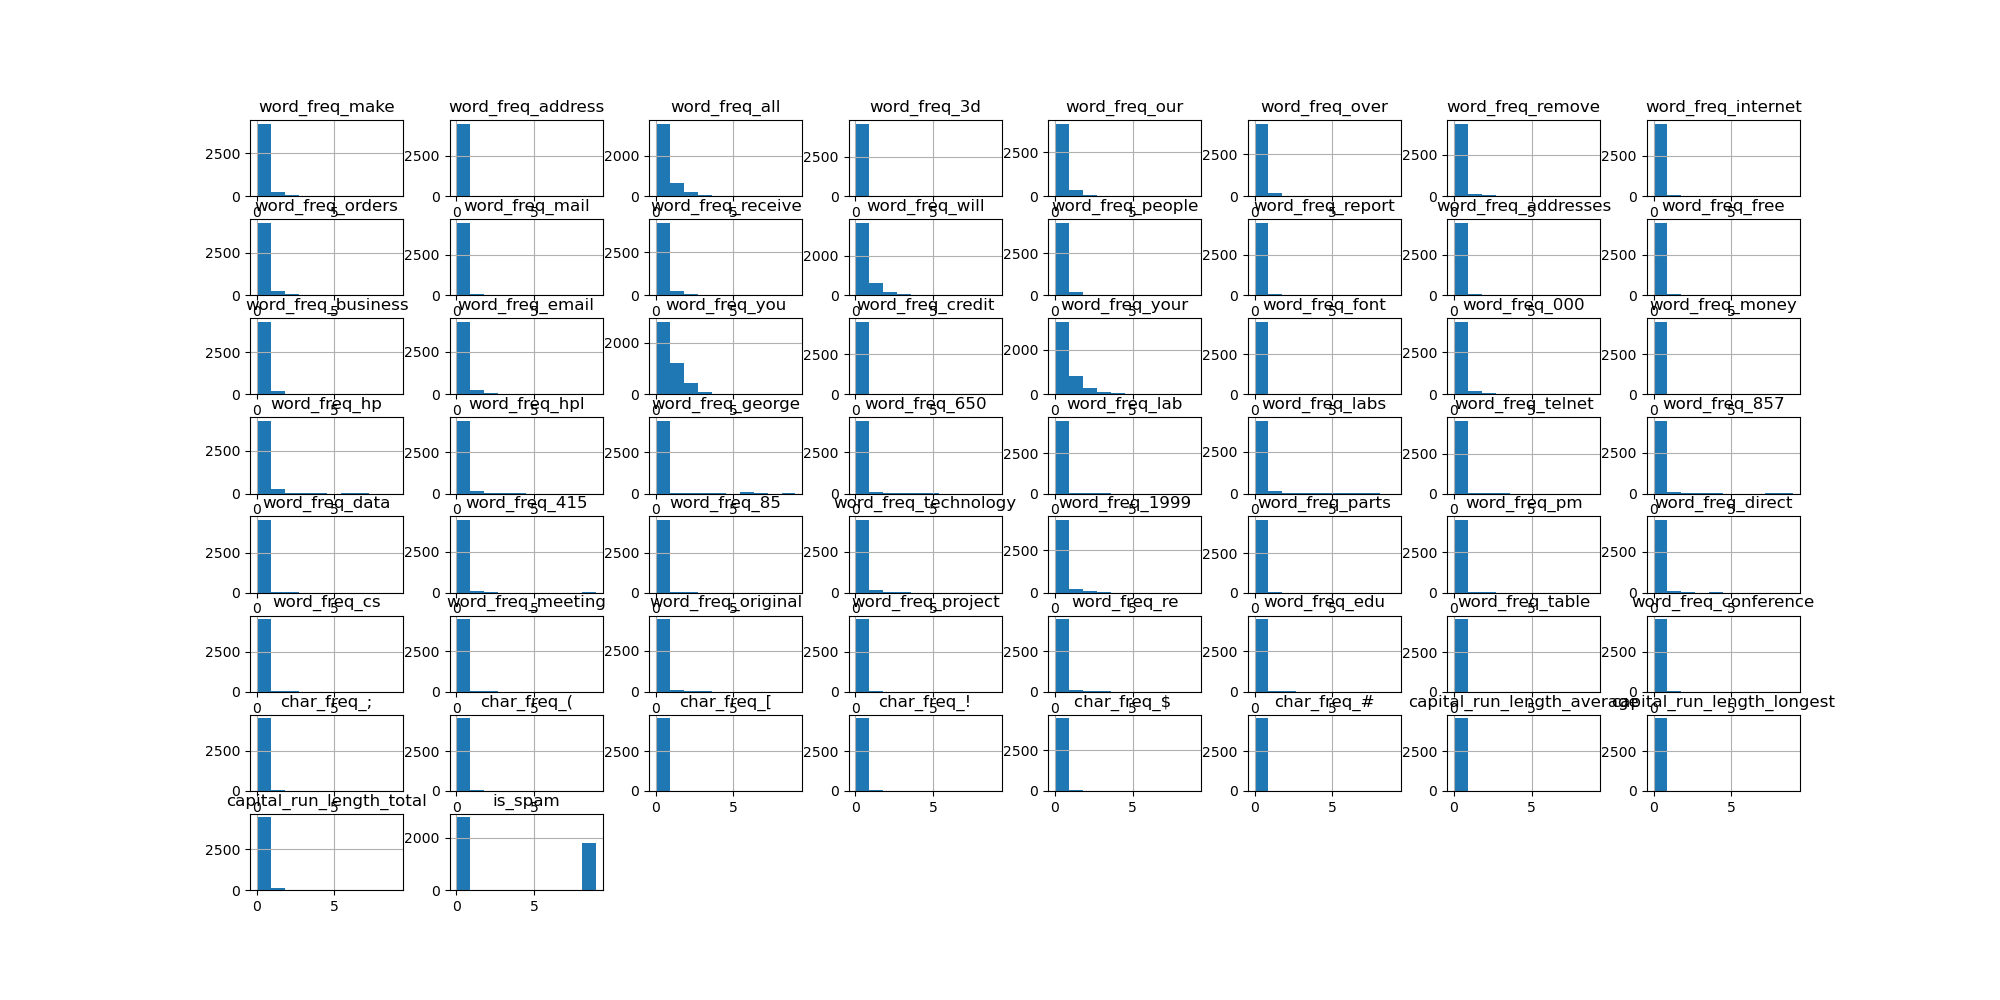

In [31]:
df_transformed.hist();
plt.show()

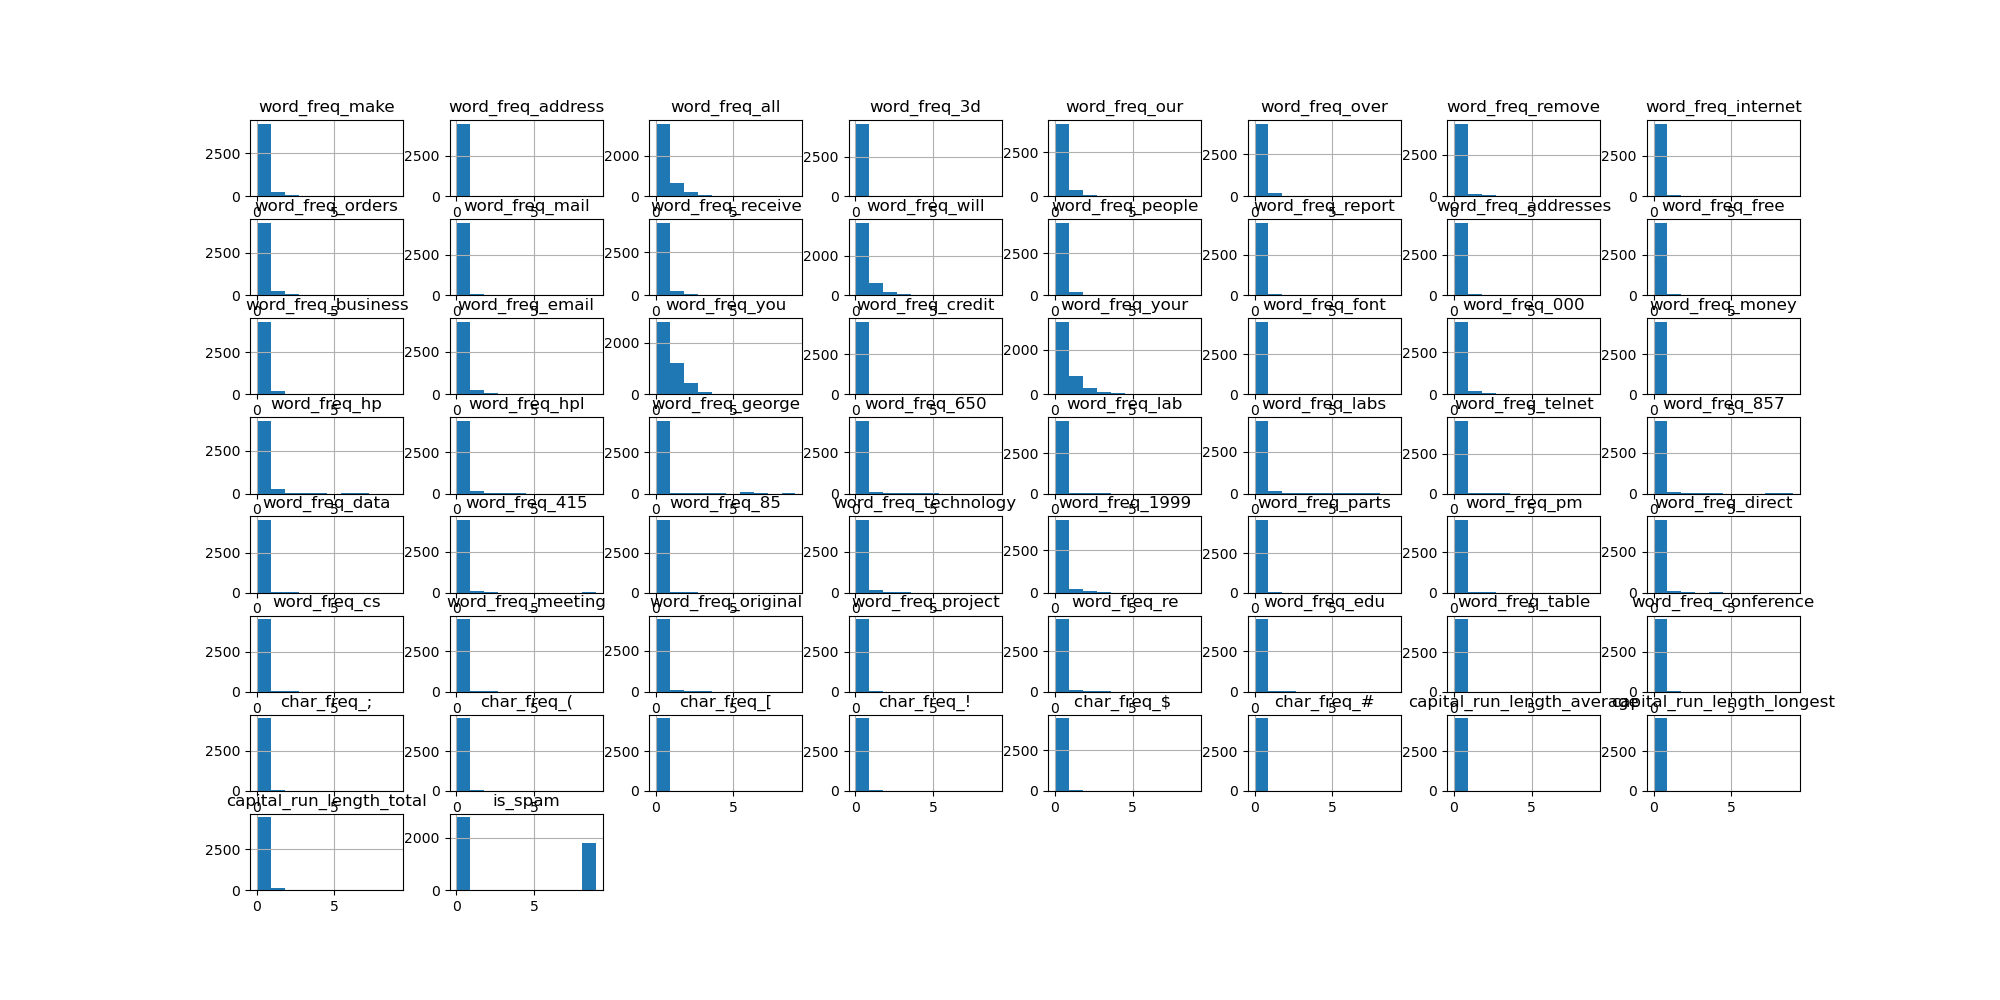

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.scatterplot(data=df_transformed, x="capital_run_length_average", y="capital_run_length_total", hue="is_spam")